## Imports

In [25]:
print('')

In [2]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

## the action!!
For all events with data, load their object . add tp_max and tc  to lists (for plotting)

In [11]:
cat[0].origins[0].time

2019-01-31T22:50:38.880000Z

In [18]:
times = []
for e in cat:
    times.append(e.origins[0].time.datetime)
times_with_data = []
for e_2 in cat_with_data:
    times_with_data.append(e_2.origins[0].time.datetime)

In [23]:
limits = [datetime.datetime(2019, 1, 1),
          datetime.datetime(2019, 2, 1),
          datetime.datetime(2019, 3, 1),
          datetime.datetime(2019, 4, 1),
          datetime.datetime(2019, 5, 1),
          datetime.datetime(2019, 6, 1),
          datetime.datetime(2019, 7, 1),
          datetime.datetime(2019, 8, 1),
          datetime.datetime(2019, 9, 1),
          datetime.datetime(2019, 10, 1),
          datetime.datetime(2019, 11, 1),
          datetime.datetime(2019, 12, 1),
          datetime.datetime(2020, 1, 1),
         ]

(array([ 388.,  357.,  372.,  355.,  467.,  553., 1129.,  521.,  650.,
         662.,  621.,    0.]),
 array([17897., 17928., 17956., 17987., 18017., 18048., 18078., 18109.,
        18140., 18170., 18201., 18231., 18262.]),
 <BarContainer object of 12 artists>)

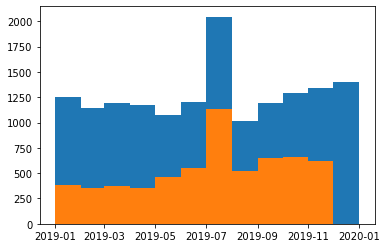

In [24]:
plt.hist(times, limits)
plt.hist(times_with_data, limits)

In [17]:
import datetime
datetime.datetime(str(times[0]))

TypeError: 'str' object cannot be interpreted as an integer

In [6]:
len(eq_with_data)

6075

In [28]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
eqs = {}
count = 0

In [29]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [30]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

6075


In [31]:
WINDOW_LENGTH = 4
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object_1s_highpass.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
        if max(eq.calculated_params['tau_p_max'])>1000:
            eq.data.plot()
    except Exception:
        print('in except')
        continue

0
1
2
3
4
5
6
7
in except
8
9
in except
10
11
in except
12
13
14
15
16
in except
17
18
19
20
21
in except
22
23
24
in except
25
26
27
28
29
30
31
32
33
34
in except
35
36
in except
37
38
in except
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
in except
56
57
58
59
60
61
62
63
64
in except
65
66
67
68
in except
69
70
71
72
73
74
75
76
77
78
79
in except
80
81
82
83
in except
84
85
86
87
88
in except
89
90
91
in except
92
in except
93
in except
94
95
96
97
98
in except
99
in except
100
101
in except
102
103
104
105
106
107
in except
108
109
110
111
in except
112
in except
113
in except
114
115
116
117
118
119
120
121
in except
122
123
in except
124
125
126
127
in except
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
in except
143
144
in except
145
146
147
148
149
150
151
152
in except
153
in except
154
155
156
157
158
159
160
161
162
in except
163
164
165
in except
166
167
168
169
170
171
172
in except
173
174
in except
175
176
177
178
179
180
in except
181
182
183
184


in except
1484
in except
1485
in except
1486
in except
1487
in except
1488
in except
1489
in except
1490
in except
1491
in except
1492
in except
1493
in except
1494
in except
1495
in except
1496
in except
1497
in except
1498
in except
1499
in except
1500
in except
1501
in except
1502
in except
1503
in except
1504
in except
1505
in except
1506
in except
1507
in except
1508
in except
1509
in except
1510
in except
1511
in except
1512
in except
1513
in except
1514
in except
1515
in except
1516
in except
1517
in except
1518
in except
1519
in except
1520
in except
1521
in except
1522
in except
1523
in except
1524
in except
1525
in except
1526
in except
1527
in except
1528
in except
1529
in except
1530
in except
1531
in except
1532
in except
1533
in except
1534
in except
1535
in except
1536
in except
1537
in except
1538
in except
1539
in except
1540
in except
1541
in except
1542
in except
1543
in except
1544
in except
1545
in except
1546
in except
1547
in except
1548
in except
1549
in except


in except
2282
in except
2283
in except
2284
in except
2285
in except
2286
in except
2287
in except
2288
in except
2289
in except
2290
in except
2291
in except
2292
in except
2293
in except
2294
in except
2295
in except
2296
in except
2297
in except
2298
in except
2299
in except
2300
in except
2301
in except
2302
in except
2303
in except
2304
in except
2305
in except
2306
in except
2307
in except
2308
in except
2309
in except
2310
in except
2311
in except
2312
in except
2313
in except
2314
in except
2315
in except
2316
in except
2317
in except
2318
in except
2319
in except
2320
in except
2321
in except
2322
in except
2323
in except
2324
in except
2325
in except
2326
in except
2327
in except
2328
in except
2329
in except
2330
in except
2331
in except
2332
in except
2333
in except
2334
in except
2335
in except
2336
in except
2337
in except
2338
in except
2339
in except
2340
in except
2341
in except
2342
in except
2343
in except
2344
in except
2345
in except
2346
in except
2347
in except


in except
2894
in except
2895
in except
2896
in except
2897
in except
2898
in except
2899
in except
2900
in except
2901
in except
2902
in except
2903
in except
2904
in except
2905
in except
2906
in except
2907
in except
2908
in except
2909
in except
2910
in except
2911
in except
2912
in except
2913
in except
2914
in except
2915
in except
2916
in except
2917
in except
2918
in except
2919
in except
2920
in except
2921
in except
2922
in except
2923
in except
2924
in except
2925
in except
2926
in except
2927
in except
2928
in except
2929
in except
2930
in except
2931
in except
2932
in except
2933
in except
2934
in except
2935
in except
2936
in except
2937
in except
2938
in except
2939
in except
2940
in except
2941
in except
2942
in except
2943
in except
2944
in except
2945
in except
2946
in except
2947
in except
2948
in except
2949
in except
2950
in except
2951
in except
2952
in except
2953
in except
2954
in except
2955
in except
2956
in except
2957
in except
2958
in except
2959
in except


in except
3585
in except
3586
in except
3587
in except
3588
in except
3589
in except
3590
in except
3591
in except
3592
in except
3593
in except
3594
in except
3595
in except
3596
in except
3597
in except
3598
in except
3599
in except
3600
in except
3601
in except
3602
in except
3603
in except
3604
in except
3605
in except
3606
in except
3607
in except
3608
in except
3609
in except
3610
in except
3611
in except
3612
in except
3613
in except
3614
in except
3615
in except
3616
in except
3617
in except
3618
in except
3619
in except
3620
in except
3621
in except
3622
in except
3623
in except
3624
in except
3625
in except
3626
in except
3627
in except
3628
in except
3629
in except
3630
in except
3631
in except
3632
in except
3633
in except
3634
in except
3635
in except
3636
in except
3637
in except
3638
in except
3639
in except
3640
in except
3641
in except
3642
in except
3643
in except
3644
in except
3645
in except
3646
in except
3647
in except
3648
in except
3649
in except
3650
in except


in except
4259
in except
4260
in except
4261
in except
4262
in except
4263
in except
4264
in except
4265
in except
4266
in except
4267
in except
4268
in except
4269
in except
4270
in except
4271
in except
4272
in except
4273
in except
4274
in except
4275
in except
4276
in except
4277
in except
4278
in except
4279
in except
4280
in except
4281
in except
4282
in except
4283
in except
4284
in except
4285
in except
4286
in except
4287
in except
4288
in except
4289
in except
4290
in except
4291
in except
4292
in except
4293
in except
4294
in except
4295
in except
4296
in except
4297
in except
4298
in except
4299
in except
4300
in except
4301
in except
4302
in except
4303
in except
4304
in except
4305
in except
4306
in except
4307
in except
4308
in except
4309
in except
4310
in except
4311
in except
4312
in except
4313
in except
4314
in except
4315
in except
4316
in except
4317
in except
4318
in except
4319
in except
4320
in except
4321
in except
4322
in except
4323
in except
4324
in except


in except
4895
in except
4896
in except
4897
in except
4898
in except
4899
in except
4900
in except
4901
in except
4902
in except
4903
in except
4904
in except
4905
in except
4906
in except
4907
in except
4908
in except
4909
in except
4910
in except
4911
in except
4912
in except
4913
in except
4914
in except
4915
in except
4916
in except
4917
in except
4918
in except
4919
in except
4920
in except
4921
in except
4922
in except
4923
in except
4924
in except
4925
in except
4926
in except
4927
in except
4928
in except
4929
in except
4930
in except
4931
in except
4932
in except
4933
in except
4934
in except
4935
in except
4936
in except
4937
in except
4938
in except
4939
in except
4940
in except
4941
in except
4942
in except
4943
in except
4944
in except
4945
in except
4946
in except
4947
in except
4948
in except
4949
in except
4950
in except
4951
in except
4952
in except
4953
in except
4954
in except
4955
in except
4956
in except
4957
in except
4958
in except
4959
in except
4960
in except


in except
5643
in except
5644
in except
5645
in except
5646
in except
5647
in except
5648
in except
5649
in except
5650
in except
5651
in except
5652
in except
5653
in except
5654
in except
5655
in except
5656
in except
5657
in except
5658
in except
5659
in except
5660
in except
5661
in except
5662
in except
5663
in except
5664
in except
5665
in except
5666
in except
5667
in except
5668
in except
5669
in except
5670
in except
5671
in except
5672
in except
5673
in except
5674
in except
5675
in except
5676
in except
5677
in except
5678
in except
5679
in except
5680
in except
5681
in except
5682
in except
5683
in except
5684
in except
5685
in except
5686
in except
5687
in except
5688
in except
5689
in except
5690
in except
5691
in except
5692
in except
5693
in except
5694
in except
5695
in except
5696
in except
5697
in except
5698
in except
5699
in except
5700
in except
5701
in except
5702
in except
5703
in except
5704
in except
5705
in except
5706
in except
5707
in except
5708
in except


In [10]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = cat.clear()
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')

In [11]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [32]:
cat

15314 Event(s) in Catalog:
2019-01-31T22:50:38.880000Z |  -6.590, +147.478 | 4.5  mb
2019-01-31T22:40:00.590000Z |  -4.638, -105.098 | 4.9  mb
...
2019-12-01T01:34:15.596000Z | -15.882,  -72.195 | 4.2  mb
2019-12-01T00:03:17.098000Z | -34.724,  -70.793 | 4.0  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [13]:
WINDOW_LENGTH = 4
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'+eq_with_data[eq_no]+'/eq_object.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
    except Exception:
        print('in except')
        continue

0
1
in except
2
3
in except
4
5
in except
6
in except
7
in except
8
9
in except
10
in except
11
12
13
14
in except
15
in except
16
in except
17
18
19
in except
20
in except
21
in except
22
in except
23
24
in except
25
in except
26
in except
27
in except
28
29
in except
30
31
32
33
34
in except
35
in except
36
in except
37
38
39
40
in except
41
42
43
44
45
46
47
in except
48
in except
49
in except
50
in except
51
in except
52
in except
53
in except
54
55
in except
56
57
in except
58
59
60
61
62
in except
63
in except
64
in except
65
in except
66
in except
67
68
69
70
in except
71
in except
72
in except
73
in except
74
in except
75
in except
76
in except
77
in except
78
79
80
81
82
83
84
in except
85
in except
86
87
in except
88
89
90
91
92
in except
93
94
in except
95
in except
96
97
in except
98
99
100
in except
101
in except
102
in except
103
104
in except
105
106
in except
107
in except
108
in except
109
in except
110
111
112
in except
113
114
in except
115
116
117
118
119
120
121
12

In [33]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [34]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [35]:
len(np.arange(3, 6.5, 0.1))

35

In [36]:
np.linspace(0.2,1,45)

array([0.2       , 0.21818182, 0.23636364, 0.25454545, 0.27272727,
       0.29090909, 0.30909091, 0.32727273, 0.34545455, 0.36363636,
       0.38181818, 0.4       , 0.41818182, 0.43636364, 0.45454545,
       0.47272727, 0.49090909, 0.50909091, 0.52727273, 0.54545455,
       0.56363636, 0.58181818, 0.6       , 0.61818182, 0.63636364,
       0.65454545, 0.67272727, 0.69090909, 0.70909091, 0.72727273,
       0.74545455, 0.76363636, 0.78181818, 0.8       , 0.81818182,
       0.83636364, 0.85454545, 0.87272727, 0.89090909, 0.90909091,
       0.92727273, 0.94545455, 0.96363636, 0.98181818, 1.        ])

In [37]:
WINDOW_LENGTH=1

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.05466854 -0.81410887]
452 452
[ 0.05466854 -0.81410888] [0.03037965 0.13040348]
452


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.03606518 -0.72042876]
315 315
[ 0.03606517 -0.72042871] [0.03693764 0.15609148]
315


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.04309969 -0.741758  ]
253 253
[ 0.04309969 -0.741758  ] [0.04201596 0.17571872]
253


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.08696037 -0.93346902]
198 198
[ 0.08696037 -0.93346902] [0.04653724 0.19361561]
198


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.11319    -1.02732382]
172 172
[ 0.11318999 -1.02732381] [0.05060268 0.20822455]
172
3.4 [ 0.14452528 -1.14966401]
134 134
[ 0.14452528 -1.14966401] [0.05737102 0.23612174]
134


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a,

3.4 [ 0.13539997 -1.11036008]
119 119
[ 0.13539997 -1.11036007] [0.06060022 0.24857833]
119
3.4 [ 0.19072235 -1.36978075]
102 102
[ 0.19072235 -1.36978075] [0.06328493 0.26036508]
102


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a,

3.4 [ 0.18922732 -1.37842042]
91 91
[ 0.18922732 -1.37842041] [0.06518672 0.26918555]
91


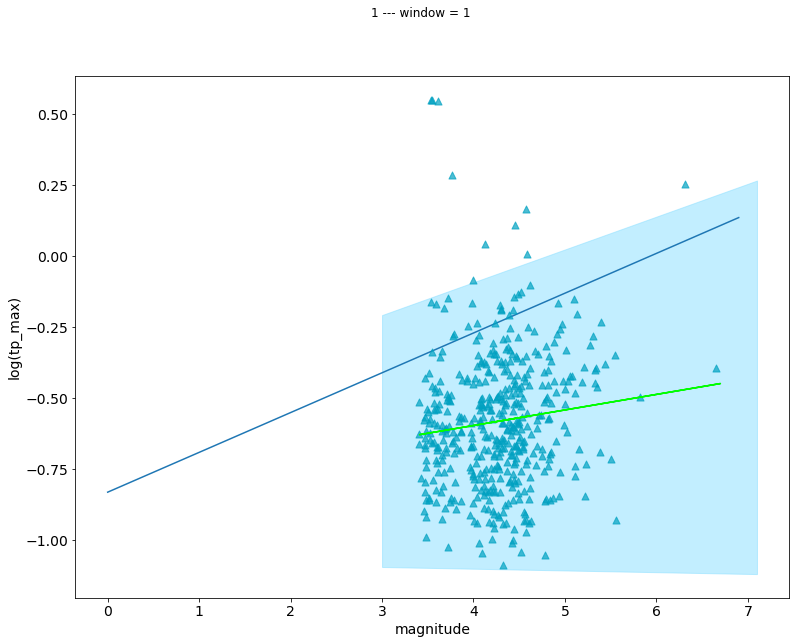

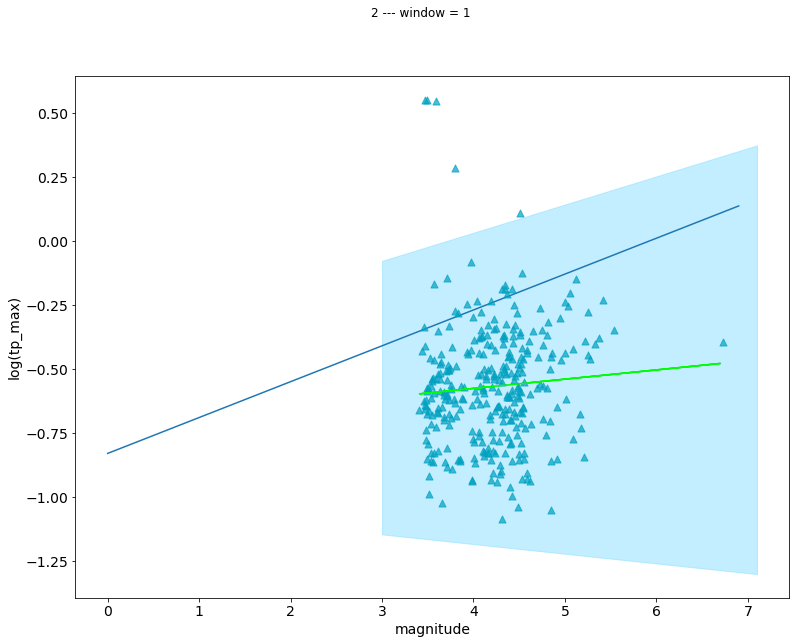

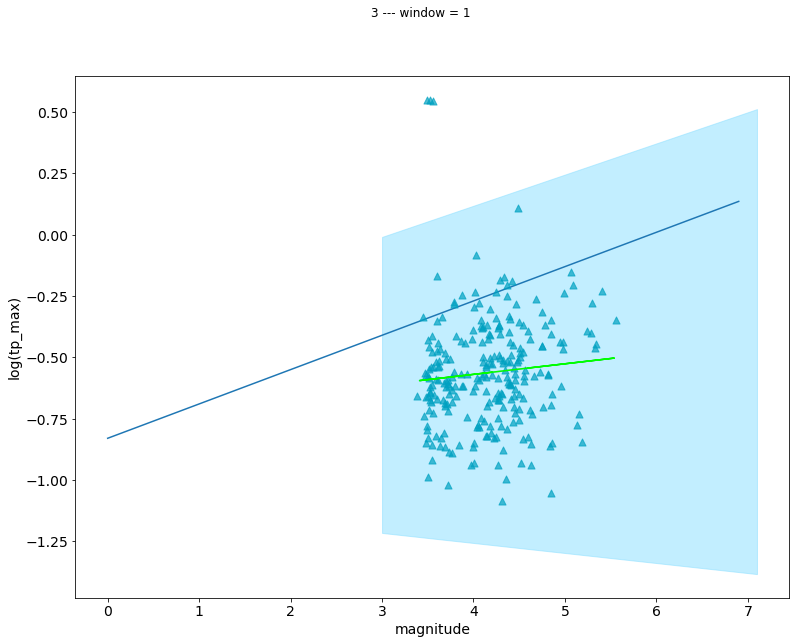

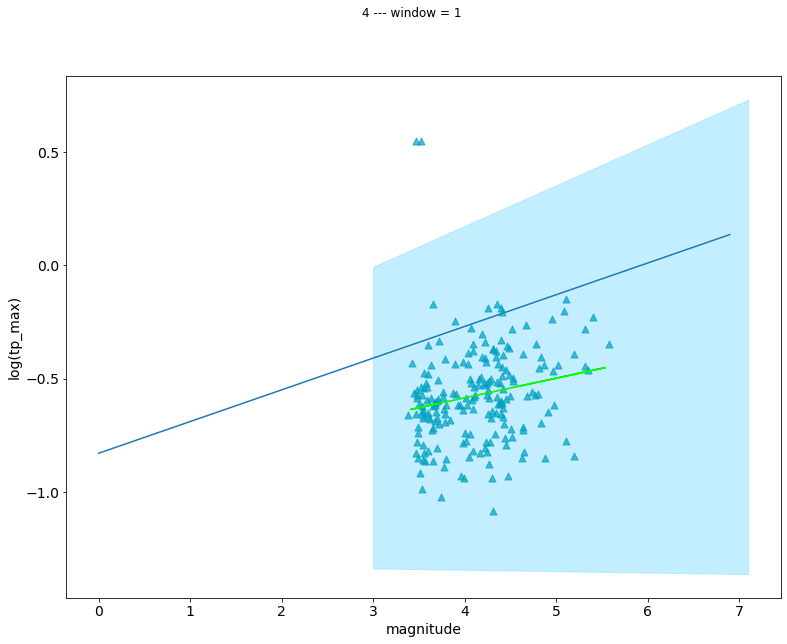

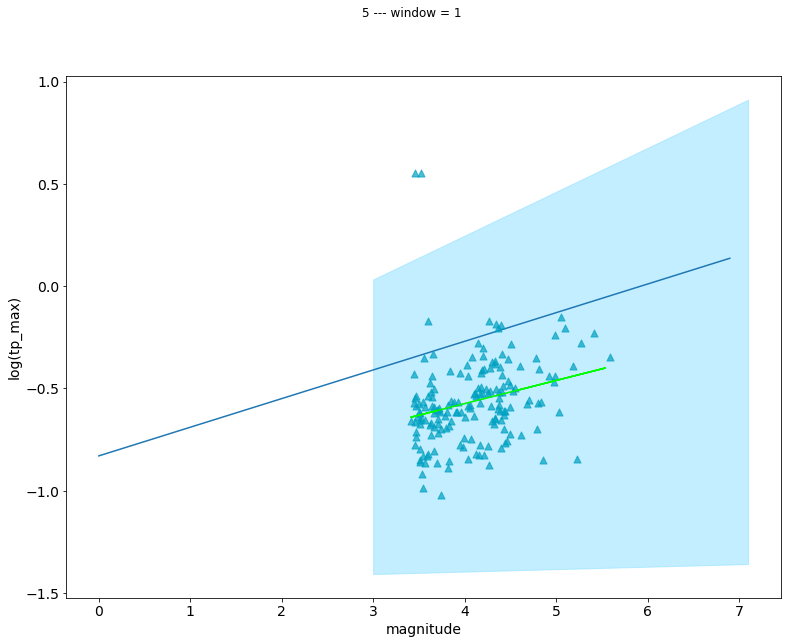

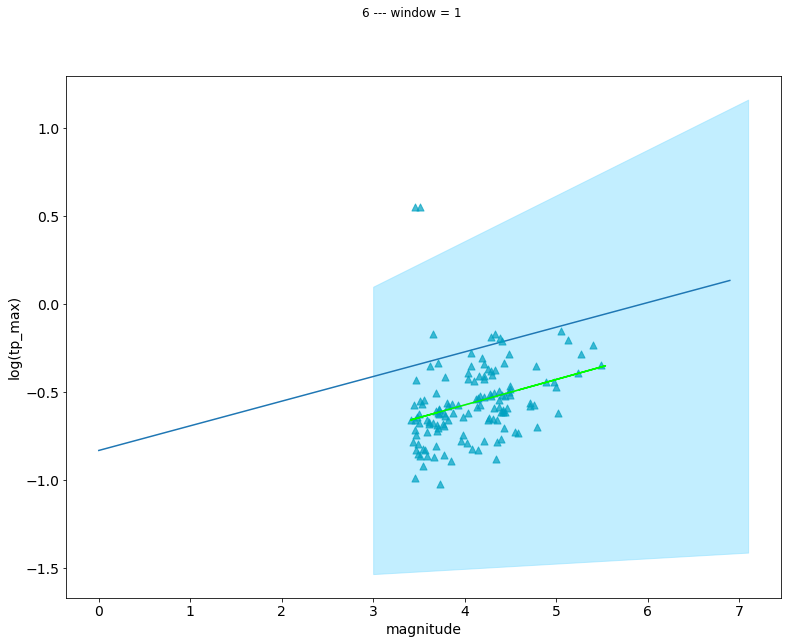

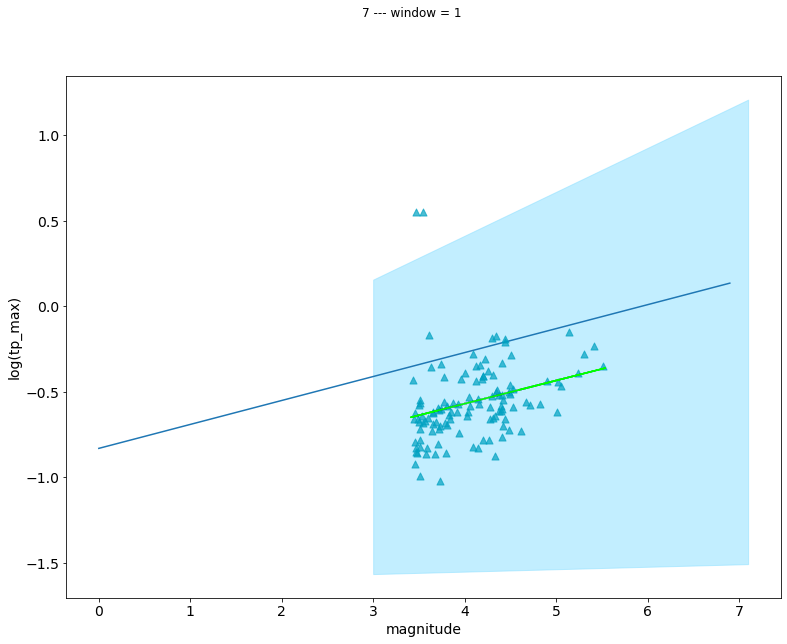

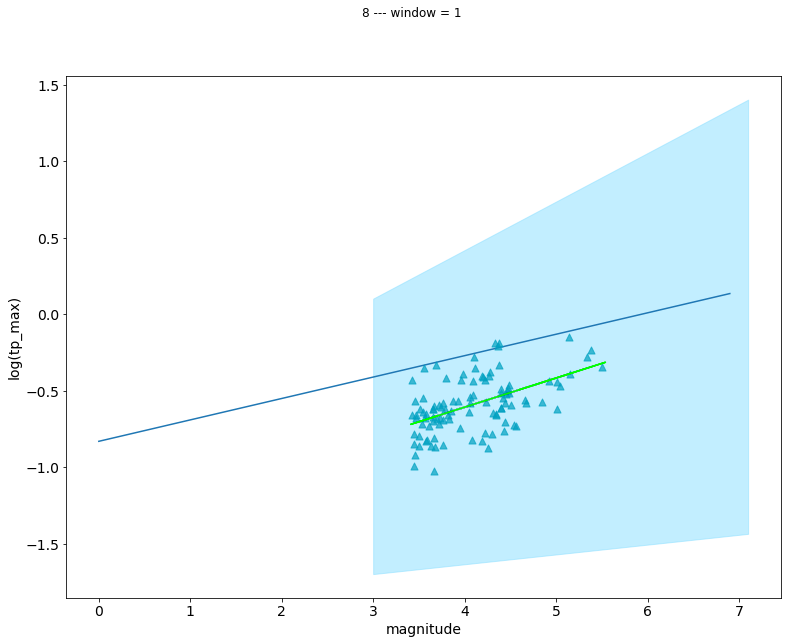

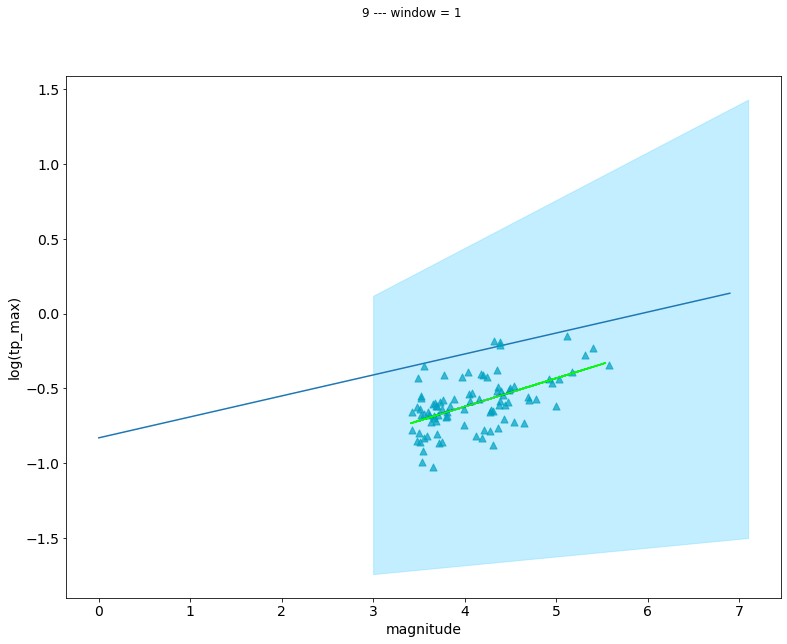

In [38]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['#00a1c1']
#fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
x_aves_tp = []
count = 1
eq_count = 0
medians = [[] for _ in range(0, 45)]
medians_of_medians = [[] for _ in range(0, 45)]
n = 0
median_absolute_deviation = []
sum_absolute_deviation = []
all_abs_deviation = []
for n in range(1, 10):
    med_for_ad = []
    mag_for_ad = []
    fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    for mag_lim in [3.4]:#, 3.4, 4.0, 4.4]:#np.arange(3.0, 6.5, 0.1):

        #print(mag_lim)
        y_aves_tp = []
        x_aves_tp = []
        for i  in range(0, len(list_mags)):
            #print(i)
            #mag_lim = 3
            #print(list_mags[i])
            #print(list_tpmax[i])
            if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                if len(list_tpmax[i])>=n:
                #print('in if')
                    mean_tp = np.mean(list_tpmax[i]) 
                    std_tp = np.std(list_tpmax[i]) 
                    y_tp = [] 
                    for j in list_tpmax[i]: 
                        if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                            y_tp.append(math.log(j, 10))
                        elif len(list_tpmax[i])==1:
                            y_tp.append(math.log(j, 10))
                    #print(y_tp)
                    x_tp = np.zeros(len(y_tp))  
                    x_tp = x_tp + list_mags[i]  
                    #print(x_tp)
                    c = 0
                    #if str(mag_lim) == str(3):# or mag_lim == 3: or 4.4?
                        #print('in if')
                    #medians_index = int(np.round(x_tp[0],1)*10)-30
                    if len(x_tp)>0 and mag_lim == 3.4:#4.4: # or len(x_tc)>0:
                        if math.isnan(np.median(y_tp))==False:
                            #axs.scatter(np.array(x_tp)+np.random.uniform(-0.05, 0.05), y_tp, s = 15, alpha = 0.2, c = cs[c], marker = '.', zorder =3) 
                        #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                            axs.scatter(list_mags[i]+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                        medians[int(np.round(x_tp[0],1)*10)-30].append(y_tp)#axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                        #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                        #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                        #FOR CURVE FITTING
                        med_for_ad.append(np.median(y_tp))
                        mag_for_ad.append(list_mags[i])
                    if math.isnan(np.median(y_tp))==False:  
                        #if np.median(y_tp):
                        y_aves_tp.append(np.median(y_tp))
                        medians_of_medians[int(np.round(x_tp[0],1)*10)-30].append(np.median(y_tp))
                        x_aves_tp.append(list_mags[i])
                    #if math.isnan(np.median(y_tc))==False:
                        #y_aves_tc.append(np.median(y_tc))
                        #x_aves_tc.append(list_mags[i])
        if len(y_aves_tp)>0:
            popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
            params.append([popt, len(x_aves_tp)])
            print(mag_lim, popt)
            axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = opacities[count], zorder =10)
            for i in range(0,4):
                x_use = []
                y_use = []
                for i in range(0, 10):
                    x_use.append(x_aves_tp)
                    y_use.append(y_aves_tp)
                y_use = np.concatenate(y_use )  
                x_use = np.concatenate(x_use )
            if str(mag_lim) == str(3.4):
                popt, pcov = curve_fit(model_function_2, x_use, y_use, absolute_sigma = True)
                axs.plot(np.array(x_use), model_function_2(np.array(x_use), *popt), color='lime', zorder =100)
                popt_final, pcov_final = popt, pcov
            #print(x_aves_tp)
            #print(y_aves_tp)
            print(len(x_aves_tp), len(y_aves_tp))
            # add 2 * std banding
            count += 1
    try:
        med = []
        med_x = []
        med2 = []
        xs = np.arange(3,7.5,0.1)
        for i in range(0, len(medians_of_medians)):
            med.append(np.median(medians_of_medians[i]))
            if len(medians_of_medians[i])>0:
                med_x.append(xs[i])
                med2.append(np.median(medians_of_medians[i]))
        #plt.scatter(np.arange(3,7.5,0.1), med, marker = '^', color='silver', zorder = 1000)
        popt, pcov = popt_final, pcov_final
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        x_me = np.arange(0, 7.2, 0.1)
        x_lower_me = x_me - perr[1]*2
        x_upper_me =  x_me + perr[1]*2
        y_me = popt[0]*x_me+popt[1]
        y_lower_me = popt[0]*x_lower_me-popt[1]
        y_upper_me = popt[0]*x_upper_me-popt[1]
        
        a = popt[0]
        b = popt[1]
        std_a = perr[0]
        std_b = perr[1]
        x_me = np.arange(3, 7.2, 0.1)
        y_1 = (a+2*std_a)*x_me + (b+2*std_b)
        y_2 = (a+2*std_a)*x_me + (b-2*std_b)
        y_3 = (a-2*std_a)*x_me + (b+2*std_b)
        y_4 = (a-2*std_a)*x_me + (b-2*std_b)
        
        y_min = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
        y_max = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))
        axs.fill_between(x_me, y_min, y_max, color = '#8adfff', alpha = 0.52, zorder =1)
        
        #convert mag to index

        #axs[0].plot(x, y_me, color = '')
        #axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
        #axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        #axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        #popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
        #axs.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow', zorder =100)
        #popt, pcov = curve_fit(model_function_2, np.array(med_x[4:21]), np.array(med2[4:21]))
        #axs.plot(med_x[4:21], model_function_2(np.array(med_x[4:21]), *popt), color='yellow', zorder =100, linestyle = '-.')
            # add 2 * std banding
        #axs[0].set_ylim([0.2,2])
        #axs[0].set_yscale('log')
        #axs[1].set_yscale('log')
        #count += 1
        #x = np.arange(3, 7.2, 0.1)
        #y = 0.14*x-0.83
        #axs.plot(x, y, color = '#2a83ab', zorder =12)
        axs.set_xlabel("magnitude", fontsize = 14) 
        #axs[1].set_xlabel("magnitude") 
        axs.set_ylabel("log(tp_max)", fontsize = 14) 
        axs.tick_params(axis='both', which='major', labelsize=14)
        axs.tick_params(axis='both', which='minor', labelsize=14)
        olsen_x = np.arange(0,7,0.1)
        olsen_y = 0.14*olsen_x - 0.83
        axs.plot(olsen_x, olsen_y)
        #axs[1].set_ylabel("tc")
        #axs.set_title("tp_max") 
        #axs[1].set_title("tc") 
        fig.suptitle(str(n)+ " --- window = "+str(WINDOW_LENGTH))
        #axs.fill_between(np.arange(3, 8), np.log10(0.33333), np.log10(10), color = 'grey', alpha = 0.5)
        #axs.fill_between(np.arange(3, 8), np.log10(0.33333), 3, color = 'grey', alpha = 0.2)
        #axs.set_ylim(-1, 1)
    except Exception:
        print('wrong')
    #axs.set_yticks(ticks=list(np.log10([0.1, 0.5,1,2])), labels = [0.1, 0.5,1,2])
    #axs.set_yticks(ticks=list(np.log10(np.arange(0.1, 3, 0.1))))
    point_indices = np.array(mag_for_ad)*10-30
    absolute_deviation = []
    for ind in range(0, len(point_indices)):
        absolute_deviation.append(abs(10**med_for_ad[int(ind)]-(10**y_me[int(point_indices[ind])])))
    print(len(absolute_deviation))
    all_abs_deviation.append(absolute_deviation)
    sum_absolute_deviation.append(np.sum(absolute_deviation))
    median_absolute_deviation.append(np.median(absolute_deviation))

    #plt.show()
    #plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/tp_and_tc/different_station_numbers/1s_bandpass_n_stations_'+str(n)+'_plus_shading_based_on_34_plus.png')

In [421]:
x_use = []
x_use.append(x_aves_tp)
x_use.append(x_aves_tp)
x_use.append(x_aves_tp)
x_use = np.concatenate(x_use )

In [422]:
x_use

array([3.7 , 3.56, 3.47, 4.4 , 3.49, 4.  , 4.3 , 3.5 , 3.5 , 3.5 , 3.6 ,
       3.8 , 4.5 , 4.3 , 3.41, 3.58, 5.2 , 4.3 , 4.5 , 4.1 , 4.4 , 4.3 ,
       3.7 , 4.2 , 3.9 , 3.7 , 4.5 , 3.6 , 4.3 , 3.7 , 5.  , 4.4 , 3.8 ,
       4.4 , 4.  , 4.4 , 4.1 , 3.7 , 3.7 , 3.8 , 3.5 , 3.5 , 4.7 , 3.6 ,
       4.2 , 5.  , 4.3 , 3.7 , 3.6 , 5.  , 4.9 , 3.8 , 5.1 , 3.8 , 4.1 ,
       4.4 , 4.4 , 3.76, 4.2 , 3.5 , 3.7 , 4.3 , 3.96, 3.46, 3.5 , 3.8 ,
       4.2 , 4.4 , 3.5 , 5.4 , 4.5 , 3.7 , 4.4 , 4.5 , 4.4 , 5.3 , 3.7 ,
       4.19, 4.  , 3.6 , 4.2 , 4.1 , 3.5 , 3.8 , 3.7 , 4.4 , 4.8 , 3.7 ,
       5.54, 4.7 , 4.6 , 3.7 , 3.56, 3.47, 4.4 , 3.49, 4.  , 4.3 , 3.5 ,
       3.5 , 3.5 , 3.6 , 3.8 , 4.5 , 4.3 , 3.41, 3.58, 5.2 , 4.3 , 4.5 ,
       4.1 , 4.4 , 4.3 , 3.7 , 4.2 , 3.9 , 3.7 , 4.5 , 3.6 , 4.3 , 3.7 ,
       5.  , 4.4 , 3.8 , 4.4 , 4.  , 4.4 , 4.1 , 3.7 , 3.7 , 3.8 , 3.5 ,
       3.5 , 4.7 , 3.6 , 4.2 , 5.  , 4.3 , 3.7 , 3.6 , 5.  , 4.9 , 3.8 ,
       5.1 , 3.8 , 4.1 , 4.4 , 4.4 , 3.76, 4.2 , 3.

In [412]:
np.array(x_aves_tp[-1]).shape

/tmp/ipykernel_206904/1690877003.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(x_aves_tp[-1]).shape


(92,)

In [355]:
    point_indices = np.array(mag_for_ad)*10-30
    absolute_deviation = []
    for ind in range(0, len(point_indices)):
        absolute_deviation.append((med_for_ad[int(ind)]-y_me[int(point_indices[ind])]))
    print(max(absolute_deviation))
    #all_abs_deviation.append(absolute_deviation)
    #median_absolute_deviation.append(np.median(absolute_deviation))

1.3376167894178086


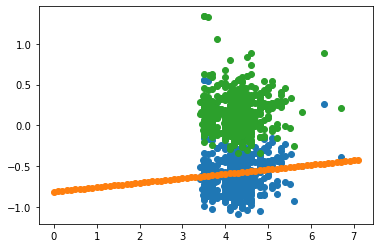

In [356]:
plt.scatter(mag_for_ad, med_for_ad)
plt.scatter(np.arange(0,7.2,0.1), y_me)
plt.scatter(mag_for_ad, absolute_deviation)

In [350]:
len(np.arange(0,7,0.1))

70

In [370]:
max(absolute_deviation)

0.6036422094607745

In [374]:
median_absolute_deviation

[71.52617478507267, 18.50351489557558]

Text(0.5, 1.0, 'distances NOT in log space')

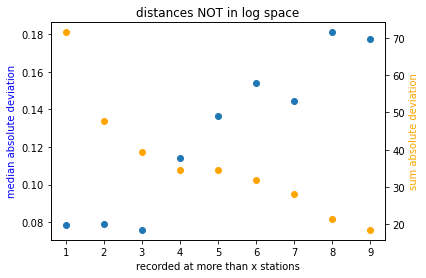

In [39]:
fig, ax1 = plt.subplots(1,1)
ax1.scatter(range(1,10), median_absolute_deviation)
ax1.set_ylabel('median absolute deviation', color = 'blue')
ax2 = ax1.twinx()
ax2.scatter(range(1,10), sum_absolute_deviation, color = 'orange')
ax2.set_ylabel('sum absolute deviation', color = 'orange')
ax1.set_xlabel('recorded at more than x stations')
plt.title('distances NOT in log space')

In [274]:
len(median_absolute_deviation)

3

In [231]:
b

-1.8428465782776975

In [223]:
std_b

3.500537357747133

In [252]:
y_1

array([-2.60399018, -2.64929384, -2.6945975 , -2.73990116, -2.78520482,
       -2.83050848, -2.87581213, -2.92111579, -2.96641945, -3.01172311,
       -3.05702677, -3.10233043, -3.14763409, -3.19293775, -3.23824141,
       -3.28354506, -3.32884872, -3.37415238, -3.41945604, -3.4647597 ,
       -3.51006336, -3.55536702, -3.60067068, -3.64597434, -3.69127799,
       -3.73658165, -3.78188531, -3.82718897, -3.87249263, -3.91779629,
       -3.96309995, -4.00840361, -4.05370727, -4.09901093, -4.14431458,
       -4.18961824, -4.2349219 , -4.28022556, -4.32552922, -4.37083288,
       -4.41613654, -4.4614402 ])

In [253]:
y_2

array([-2.71474534, -2.760049  , -2.80535265, -2.85065631, -2.89595997,
       -2.94126363, -2.98656729, -3.03187095, -3.07717461, -3.12247827,
       -3.16778193, -3.21308558, -3.25838924, -3.3036929 , -3.34899656,
       -3.39430022, -3.43960388, -3.48490754, -3.5302112 , -3.57551486,
       -3.62081851, -3.66612217, -3.71142583, -3.75672949, -3.80203315,
       -3.84733681, -3.89264047, -3.93794413, -3.98324779, -4.02855144,
       -4.0738551 , -4.11915876, -4.16446242, -4.20976608, -4.25506974,
       -4.3003734 , -4.34567706, -4.39098072, -4.43628437, -4.48158803,
       -4.52689169, -4.57219535])

In [254]:
y_3

array([1.1560422 , 1.23607296, 1.31610371, 1.39613447, 1.47616522,
       1.55619597, 1.63622673, 1.71625748, 1.79628824, 1.87631899,
       1.95634974, 2.0363805 , 2.11641125, 2.19644201, 2.27647276,
       2.35650351, 2.43653427, 2.51656502, 2.59659578, 2.67662653,
       2.75665728, 2.83668804, 2.91671879, 2.99674955, 3.0767803 ,
       3.15681105, 3.23684181, 3.31687256, 3.39690331, 3.47693407,
       3.55696482, 3.63699558, 3.71702633, 3.79705708, 3.87708784,
       3.95711859, 4.03714935, 4.1171801 , 4.19721085, 4.27724161,
       4.35727236, 4.43730312])

In [255]:
y_4

array([1.04528705, 1.1253178 , 1.20534856, 1.28537931, 1.36541007,
       1.44544082, 1.52547157, 1.60550233, 1.68553308, 1.76556383,
       1.84559459, 1.92562534, 2.0056561 , 2.08568685, 2.1657176 ,
       2.24574836, 2.32577911, 2.40580987, 2.48584062, 2.56587137,
       2.64590213, 2.72593288, 2.80596364, 2.88599439, 2.96602514,
       3.0460559 , 3.12608665, 3.20611741, 3.28614816, 3.36617891,
       3.44620967, 3.52624042, 3.60627118, 3.68630193, 3.76633268,
       3.84636344, 3.92639419, 4.00642495, 4.0864557 , 4.16648645,
       4.24651721, 4.32654796])

In [256]:
y_min

array([-2.71474534, -2.760049  , -2.80535265, -2.85065631, -2.89595997,
       -2.94126363, -2.98656729, -3.03187095, -3.07717461, -3.12247827,
       -3.16778193, -3.21308558, -3.25838924, -3.3036929 , -3.34899656,
       -3.39430022, -3.43960388, -3.48490754, -3.5302112 , -3.57551486,
       -3.62081851, -3.66612217, -3.71142583, -3.75672949, -3.80203315,
       -3.84733681, -3.89264047, -3.93794413, -3.98324779, -4.02855144,
       -4.0738551 , -4.11915876, -4.16446242, -4.20976608, -4.25506974,
       -4.3003734 , -4.34567706, -4.39098072, -4.43628437, -4.48158803,
       -4.52689169, -4.57219535])

In [257]:
y_max

array([1.1560422 , 1.23607296, 1.31610371, 1.39613447, 1.47616522,
       1.55619597, 1.63622673, 1.71625748, 1.79628824, 1.87631899,
       1.95634974, 2.0363805 , 2.11641125, 2.19644201, 2.27647276,
       2.35650351, 2.43653427, 2.51656502, 2.59659578, 2.67662653,
       2.75665728, 2.83668804, 2.91671879, 2.99674955, 3.0767803 ,
       3.15681105, 3.23684181, 3.31687256, 3.39690331, 3.47693407,
       3.55696482, 3.63699558, 3.71702633, 3.79705708, 3.87708784,
       3.95711859, 4.03714935, 4.1171801 , 4.19721085, 4.27724161,
       4.35727236, 4.43730312])

In [258]:
y_me

array([-1.30025799, -1.28289444, -1.2655309 , -1.24816735, -1.2308038 ,
       -1.21344025, -1.19607671, -1.17871316, -1.16134961, -1.14398606,
       -1.12662252, -1.10925897, -1.09189542, -1.07453187, -1.05716833,
       -1.03980478, -1.02244123, -1.00507768, -0.98771414, -0.97035059,
       -0.95298704, -0.93562349, -0.91825995, -0.9008964 , -0.88353285,
       -0.8661693 , -0.84880576, -0.83144221, -0.81407866, -0.79671511,
       -0.77935157, -0.76198802, -0.74462447, -0.72726092, -0.70989738,
       -0.69253383, -0.67517028, -0.65780673, -0.64044319, -0.62307964,
       -0.60571609, -0.58835254, -0.570989  , -0.55362545, -0.5362619 ,
       -0.51889835, -0.50153481, -0.48417126, -0.46680771, -0.44944416,
       -0.43208062, -0.41471707, -0.39735352, -0.37998997, -0.36262643,
       -0.34526288, -0.32789933, -0.31053578, -0.29317224, -0.27580869,
       -0.25844514, -0.24108159, -0.22371805, -0.2063545 , -0.18899095,
       -0.1716274 , -0.15426386, -0.13690031, -0.11953676, -0.10

In [111]:
len(list_tpmax)

1916

In [20]:
model_function_2(np.array(med_x), *popt)

array([-0.18695203, -0.18167262, -0.1763932 , -0.17111379, -0.16583437,
       -0.16055495, -0.15527554, -0.14999612, -0.14471671, -0.13943729,
       -0.13415788, -0.12887846, -0.12359905, -0.11831963, -0.11304022,
       -0.1077608 , -0.10248139, -0.09720197, -0.09192256, -0.08664314,
       -0.08136373, -0.07608431, -0.07080489, -0.06552548, -0.06024606,
       -0.05496665, -0.04968723, -0.04440782, -0.0391284 , -0.03384899,
       -0.02856957, -0.02329016, -0.01801074, -0.01273133, -0.00745191,
        0.00310692,  0.00838633])

In [21]:
popt

array([ 0.05279415, -0.34533449])

In [22]:
for i in range(0, len(medians_of_medians)):
    print(np.median(medians_of_medians[i]))

0.0359709009931
-0.0167926868474
-0.0648284063754
-0.0785886005785
-0.0835941078783
-0.149854314995
-0.171974242086
-0.147821006134
-0.141986972293
-0.144960680499
-0.183479765286
-0.14514734948
-0.162299033688
-0.144871211066
-0.136131500234
-0.0942710720607
-0.126023166988
-0.1105517435
-0.074074429647
-0.0247722483341
-0.0593709680978
-0.037950916436
-0.0692763669416
0.250636947994
0.0475253557988
0.137148177057
0.251415345353
0.358515014549
2.33792854708
0.233169744912
0.641831857
0.561947939457
1.19355444276
0.303367850044
0.518774743216
nan
0.484512418377
1.18854166523
nan
nan
nan
nan
nan
nan
nan


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must be the same size

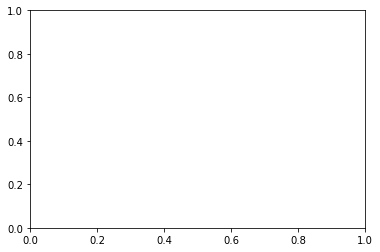

In [23]:
plt.scatter(np.arange(3,7.5,0.1), np.median(medians_of_medians))

In [ ]:
popt

In [ ]:
pcov

In [ ]:
gradt = []
intercept = []
for i in params:
    gradt.append(i[0])
    intercept.append(i[1])

In [ ]:
bins

In [ ]:
plt.plot(n)

In [ ]:
%matplotlib qt
# create figure and axis objects with subplots()
fig,axs = plt.subplots(4,1, figsize = (15,9), sharex = True)
ax = axs[0]
ax4 = axs[1]
ax2 = axs[2]
ax3 = axs[3]
# make a plot
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
ax.plot(bins[:-1]+0.05, n, color="red", marker="o")
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
for i in range(1, len(n)):
    n[i] = n[i]+n[i-1]
#ax4 = ax.twinx()
ax4.plot(bins[:-1]+0.05, n, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("year",fontsize=14)
# set y-axis label
#ax.set_ylabel("lifeExp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
#ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.arange(3,6.6,0.1),intercept, color="blue",marker="o")
ax2.hlines(-0.83, 3, 7.5, color='blue')
ax3.plot(np.arange(3,6.6,0.1),gradt, color="green",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax3.hlines(0.14, 3, 7.5, color='green')

ax.set_yscale('log')
ax4.set_yscale('log')
axs[0].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[0].grid(axis = 'x', which='minor', linestyle=':')
axs[1].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[1].grid(axis = 'x', which='minor', linestyle=':')
axs[2].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[2].grid(axis = 'x',which='minor', linestyle=':')
axs[3].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[3].grid(axis = 'x', which='minor', linestyle=':')
ax.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()

ax.set_ylabel("log(N)",color="red",fontsize=14)
ax4.set_ylabel("log(cumulative N)",color="red",fontsize=14)
ax2.set_ylabel("intercept",color="blue",fontsize=14)
ax3.set_ylabel("gradient",color="green",fontsize=14)
ax3.set_xlabel('magnitude')
#ax3.set_xlim([3,5])
plt.show()

In [ ]:
plt.axvline()

In [ ]:
plt.hist(list_mags, bins = np.arange(3,7.5,0.1))
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('magnitude')

In [ ]:
x_tp

In [ ]:
y

In [ ]:
min(y_tp)

In [ ]:
x_tp

In [ ]:
plt.figure(figsize=(20,10))
y_limits = np.linspace(min(y_tp), max(y_tp), 40)
x_limits = np.linspace(3, 7, 41)
H, xedges, yedges = np.histogram2d(list(x_tp), list(y_tp), bins=[x_limits, y_limits])
H = H.T

plt.imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], (yedges[0]), (yedges[-1])], aspect = 0.5, cmap = 'inferno', vmin = np.log10(0.5))
plt.colorbar(label = 'log10(histogram amplitude)')

plt.ylabel('log10(tp_max)')
plt.xlabel('magntitude')
plt.ylim([-1,3])

#initial_guess = (1.4,0)
#res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
#x = np.linspace(min(mag_plot), max(mag_plot), 20)
#y = res.x[0] * x + res.x[1]
#plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.scatter(np.arange(3, 6.8, 0.1), np.log10(mag_bin_medians), marker = 'x', color = 'silver')


plt.scatter(med_x, med2, marker = '^', color='silver', zorder = 1000)

popt, pcov = curve_fit(model_function_2, np.array(med_x[4:20]), np.array(med2[4:20]))
plt.plot(med_x[4:20], model_function_2(np.array(med_x[4:20]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:28]), np.array(med2[20:28]))
plt.plot(med_x[20:28], model_function_2(np.array(med_x[20:28]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:]), np.array(med2[20:]))
plt.plot(med_x[20:], model_function_2(np.array(med_x[20:]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
plt.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow')

plt.show()

In [ ]:
popt

In [ ]:
x_tp = []
y_tp = []
for i  in range(0, len(list_mags)):
    mag_lim = 3.4
    count = 0
    if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
        mean_tp = np.mean(list_tpmax[i]) 
        std_tp = np.std(list_tpmax[i]) 
        for j in list_tpmax[i]: 
            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                y_tp.append(math.log(j, 10))
                count += 1
            elif len(list_tpmax[i])==1:
                y_tp.append(math.log(j, 10))
                count += 1

        x_mag = np.zeros(count)  
        x_mag = x_mag + list_mags[i]
        x_tp = np.concatenate((np.array(x_tp), np.array(x_mag)))


In [ ]:
x_mag

find location of tpmax in time

In [24]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [25]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

3386


In [32]:
eq.data[0].stats['sampling_rate']

In [33]:
eq.data

36 Trace(s) in Stream:

AV.AKBB..BHE | 2019-01-31T08:50:20.080000Z - 2019-01-31T09:00:20.080000Z | 50.0 Hz, 30001 samples
...
(34 other traces)
...
AV.ZRO..BHZ | 2019-01-31T08:50:20.080000Z - 2019-01-31T09:00:20.080000Z | 50.0 Hz, 30001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [69]:
eq.data_stats['picks']

{'TA.M22K.': 2019-01-31T03:52:57.150000Z,
 'AT.PMR.': 2019-01-31T03:52:59.430000Z,
 'AK.GHO.': 2019-01-31T03:52:59.648400Z,
 'AK.CUT.': 2019-01-31T03:53:00.380000Z,
 'GM.AD09.00': 2019-01-31T03:53:01.843131Z,
 'AK.SSN.': 2019-01-31T03:53:02.218400Z,
 'AK.SAW.': 2019-01-31T03:53:02.588400Z,
 'AK.SKN.': 2019-01-31T03:53:04.018400Z,
 'AK.KNK.': 2019-01-31T03:53:04.488400Z,
 'AK.RC01.': 2019-01-31T03:53:04.560000Z,
 'AK.FIRE.': 2019-01-31T03:53:04.898400Z,
 'TA.M23K.': 2019-01-31T03:53:06.680000Z}

In [73]:
eq.data[0].stats

         network: GM
         station: AD09
        location: 00
         channel: HH1
       starttime: 2019-01-31T03:47:50.303131Z
         endtime: 2019-01-31T03:57:50.293131Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 20, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 81920})
      processing: ["ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7f903a522ee0>::output='VEL'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)"]

In [74]:
eq.data[0].stats.network+'.'+eq.data[0].stats.station+'.'+eq.data[0].stats.location

'GM.AD09.00'

In [ ]:
eq.data

In [181]:
%matplotlib qt 
WINDOW_LENGTH = 4
diff = []
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    #try:
    with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object.pkl', 'rb') as picklefile:
        eq = pickle.load(picklefile)
        keys = list(eq.data_stats['picks'].keys())
        #print(eq.data)
        for i in range(len(eq.calculated_params['tau_p_max'])):
            
            name = eq.data[i*3+2].stats.network+'.'+eq.data[i*3+2].stats.station+'.'+eq.data[i*3+2].stats.location
            if name in eq.data_stats['picks'].keys():
                #print(eq.data[i*3].stats.network+'.'+eq.data[i*3].stats.station+'.'+eq.data[i*3].stats.location)
                #eq.data[i*3].plot()
                pick = (eq.data_stats['picks'][name]-eq.data[i*3+2].stats.starttime)*eq.data[i*3+2].stats.sampling_rate
                #plt.plot(eq.calculated_params['tau_p'][i])
                #plt.axhline(eq.calculated_params['tau_p_max'][i], 0, 1000)
                #plt.show()
                pick_seconds = pick / (eq.data[i*3].stats['sampling_rate'])
                a = np.where(eq.calculated_params['tau_p'][i][int(pick):]==eq.calculated_params['tau_p_max'][i])
                if len(a[0])>0:
                    max_loc = a[0][0]* 100/(eq.data[i*3+2].stats['sampling_rate'])+pick * 100/(eq.data[i*3+2].stats['sampling_rate'])
                    #print(eq.data[i*3])
                    if abs(max_loc-pick* 100/(eq.data[i*3+2].stats['sampling_rate'])) < 4 * eq.data[i*3].stats['sampling_rate']:
                        #eq.data[i*3+2].plot()
                        #plt.plot(eq.calculated_params['tau_p'][i][int(pick):])
                        #plt.axhline(eq.calculated_params['tau_p_max'][i], 0, 1000)
                        #plt.show()
                        #print(i)
                        #print(eq.calculated_params['tau_p_max'][i])
                        #print(max(eq.calculated_params['tau_p'][i][int(pick)+50:int(pick)+400]))
                        #print(eq.data[i*3+2].stats.sampling_rate)
                        #print(pick)
                        #print(max_loc)
                        #print(max_loc-pick* 100/(eq.data[i*3].stats['sampling_rate']))
                        diff.append((max_loc-pick*100/(eq.data[i*3].stats['sampling_rate']))/100)
    #list_tpmax.append(eq.calculated_params['tau_p_max'])

    #except Exception:
    #    print('in except')
    #    continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


FileNotFoundError: [Errno 2] No such file or directory: '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/20190706_063447.a/eq_object.pkl'

In [178]:
a[0][0]

10

In [131]:
eq.calculated_params['tau_p_max'][i]

7.099489839553927

In [185]:
max(diff)

197.36700000000002

In [188]:
plt.hist(diff, np.arange(0, 4, 0.1))
plt.ylabel('time from pick')
plt.xlabel('n')
plt.title('timing of tpmax')

Text(0.5, 1.0, 'timing of tpmax')

In [107]:
a

(array([], dtype=int64),)

In [104]:
eq.calculated_params['tau_p'][i][int(pick):]

array([ 0.36418575,  0.36451736,  0.36515183, ...,  4.57211618,
        4.55904055,  4.54593945])

In [105]:
eq.calculated_params['tau_p_max'][i]

0.53657723300601767